In [1]:
%matplotlib inline
from __future__ import division
import pickle
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

pd.set_option('display.max_columns', 25)

### Load data from previously saved pickle file

In [2]:
with open('un_reshape.pkl', 'r') as picklefile:
    undata = pickle.load(picklefile)

In [3]:
undata.shape

(5488, 84)

In [4]:
undata.describe()

,year,isdeveloped,isldc2014,islldc,ismdgcountry,gdppc2012,population2012,AIDS deaths,Net ODA to LDCs as percentage of OECD/DAC donors GNI,"ODA that is untied, million US$","ODA that is untied, percentage","ODA provided to help build trade capacity, percentage",...,"Antiretroviral therapy coverage among people with advanced HIV infection, percentage (lower bound)","Poverty gap ratio at $1.25 a day (PPP), percentage","Purchasing power parities (PPP) conversion factor, local currency unit to international dollar",Percentage of HIV-infected pregnant women who received antiretroviral drugs to reduce the risk for mother-to-child transmission (upper bound),"Current contraceptive use among married women 15-49 years old, any method, percentage","HIV incidence rate, 15-49 years old, percentage (lower bound)","ODA to basic social services, million US$","Developed country imports from the LDCs, admitted duty free, percentage","Antenatal care coverage, at least one visit, percentage","Adolescent birth rate, per 1,000 women","Condom use at last high-risk sex, 15-24 years old, women, percentage","Antiretroviral therapy coverage among people with advanced HIV infection, percentage (upper bound)"
count,5488.000000,5488.000000,5488.000000,5488.000000,5488,5192.000000,5.192000e+03,2808.000000,610.000000,464.000000,193.000000,212.000000,...,316.000000,853.000000,3.744000e+03,205.000000,746.000000,1980.000000,395.000000,9.310000e+02,698.000000,2816.000000,203.000000,322.000000
mean,2001.957362,0.233601,0.220117,0.009111,1,15415.862230,3.413563e+07,12499.943302,0.119832,1993.156426,71.663057,25.945330,...,34.379209,6.228148,2.214963e+02,60.369805,47.832306,0.342587,403.050405,-1.383553e+07,83.174255,44.616023,39.697488,53.068913
std,7.215928,0.423160,0.414363,0.095023,0,22388.004586,1.324858e+08,36711.905058,0.105204,3384.985277,23.671160,12.655314,...,21.193996,9.827420,9.227756e+02,32.150160,23.485826,0.755555,1086.411593,1.718807e+08,18.901341,37.863479,19.219187,26.174559
min,1984.000000,0.000000,0.000000,0.000000,1,128.100000,5.046000e+03,0.000000,0.000035,0.000000,3.310000,0.140000,...,1.100000,0.000000,3.330000e-09,0.220000,1.700000,0.000000,0.000000,-2.146826e+09,15.400000,0.000000,1.300000,2.510000
25%,1996.000000,0.000000,0.000000,0.000000,1,1716.200000,1.230985e+06,122.750000,0.040000,220.757500,57.610000,17.040000,...,18.902500,0.200000,1.090000e+00,31.070000,26.000000,0.010000,39.955000,9.199000e+01,76.550000,15.800000,25.200000,32.745000
50%,2002.000000,0.000000,0.000000,0.000000,1,6300.800000,6.645827e+06,981.000000,0.090000,696.445000,77.120000,23.615000,...,30.575000,2.140000,4.555000e+00,65.430000,51.500000,0.050000,105.060000,9.946000e+01,90.450000,33.600000,39.300000,51.400000
75%,2008.000000,0.000000,0.000000,0.000000,1,19680.300000,2.229391e+07,5622.000000,0.167500,2017.922500,92.930000,31.902500,...,47.310000,7.490000,7.986000e+01,95.000000,67.650000,0.260000,358.245000,9.998000e+01,97.100000,63.000000,54.550000,72.955000
max,2015.000000,1.000000,1.000000,1.000000,1,158976.800000,1.377065e+09,407865.000000,0.520000,21520.220000,100.000000,69.050000,...,92.450000,65.360000,1.738667e+04,95.000000,88.400000,5.630000,8694.440000,1.000000e+02,100.000000,229.000000,82.000000,95.000000


###Transform column names for easier calling

Remove all non-letters and non-numbers from column names and replace spaces with underscore.

In [5]:
for column in undata.columns:
    name_as_list = column.split()
    new_list = []
    for word in name_as_list:
        word = re.sub("[^a-z0-9]", "", word.lower())
        new_list.append(word)
    new_name = '_'.join(new_list)
    undata.rename(columns={column: new_name}, inplace=True)

In [6]:
for column in sorted(undata.columns):
    print column

adolescent_birth_rate_per_1000_women
agriculture_support_estimate_for_oecd_countries_as_percentage_of_their_gdp
agriculture_support_estimate_for_oecd_countries_million_us
aids_deaths
aids_deaths_lower_bound
aids_deaths_upper_bound
aids_orphans_one_or_both_parents
antenatal_care_coverage_at_least_four_visits_percentage
antenatal_care_coverage_at_least_one_visit_percentage
antiretroviral_therapy_coverage_among_people_with_advanced_hiv_infection_percentage
antiretroviral_therapy_coverage_among_people_with_advanced_hiv_infection_percentage_lower_bound
antiretroviral_therapy_coverage_among_people_with_advanced_hiv_infection_percentage_upper_bound
condom_use_at_last_highrisk_sex_1524_years_old_men_percentage
condom_use_at_last_highrisk_sex_1524_years_old_women_percentage
condom_use_population_ages_1524_female__of_females_ages_1524
condom_use_population_ages_1524_male__of_males_ages_1524
condom_use_to_overall_contraceptive_use_among_currently_married_women_1549_years_old_percentage
condom_use

### Convert column values to floats

Values merged from the World Bank database seem to have been read in as strings, so it is necessary to convert them to numbers.

In [7]:
def convert_strings(col):
    undata[col] = undata[col].map(lambda x: float(x))
    return undata

In [8]:
contra = 'contraceptive_prevalence__of_women_ages_1549'
net_odadol = 'net_official_development_assistance_received_current_us'
net_odadol2 = 'net_official_development_assistance_and_official_aid_received_current_us'
net_odapc = 'net_oda_received_per_capita_current_us'
net_odapct = 'net_oda_received__of_gni'
pop = 'population_total'
hiv_prev = 'prevalence_of_hiv_total__of_population_ages_1549'
gni = 'gni_per_capita_atlas_method_current_us'

# columns to convert
string_cols = [contra, net_odadol, net_odadol2, net_odapc, net_odapct, pop, hiv_prev, gni]

In [9]:
for col in string_cols:
    undata = convert_strings(col)

Create new variable of net ODA (Ofiicial Development Assistance) recieved in millions.

In [10]:
undata['net_oda_mill'] = undata[net_odadol].map(lambda x: x / 1000000)
undata['net_odaplus_mill'] = undata[net_odadol2].map(lambda x: x / 1000000)

### Limit years of data to use

Most data is available for the years 1990 to 2013 inclusive. Limit data to those years.

In [11]:
unlimit = undata[undata['year'] >= 1990]
unlimit = unlimit[unlimit['year'] < 2014]

Save new dataframe to pickle file for use in further explorations.

In [12]:
with open('un_explore.pkl', 'w') as picklefile:
    pickle.dump(unlimit, picklefile)

###Create reusable plotting functions

Created funtions for easy plotting.

* `plot_me_data`: plots the mean of a variable over time as a bar plot
* `plot_su_data`: plots the sum of a variable per year over time as a bar plot
* `plot_by_country`: plots each country over time in a single line plot
* `plot_by_region`: plots each region over time in a single line plot

It is difficult to read the `plot_by_country` output because there are so many countries and a legend would obscure the plot, however, from these we can get a sense of general trends for more detailed exploration later.

In [13]:
def plot_me_data(row, ylabel='percent'):
    yearly = unlimit.groupby(['year'])[row].mean()

    plt.figure(figsize = (12,5))
    yearly.plot(kind='bar', x='year', y=row)
    plt.title(row)
    plt.ylabel(ylabel)

In [14]:
def plot_su_data(row, ylabel='percent'):
    yearly = unlimit.groupby(['year'])[row].sum()

    plt.figure(figsize = (12,5))
    yearly.plot(kind='bar', x='year', y=row)
    plt.title(row)
    plt.ylabel(ylabel)

In [15]:
def plot_by_country(col, ylabel='percent'):
    plt.figure(figsize=(12,5))
    for country in set(unlimit['countryname']):
        cp = unlimit[unlimit['countryname'] == country]
        cp = cp.sort(columns='year')
        plt.plot(cp['year'], cp[col], label=country)
        
    plt.title(col)
    plt.xlabel('year')
    plt.ylabel(ylabel)
    plt.show()

In [16]:
def plot_by_region(col, ylabel='percent'):
    plt.figure(figsize=(12,5))
    for region in set(unlimit['mdgregions']):
        cp = unlimit[unlimit['mdgregions'] == region]
        cp = pd.DataFrame(cp.groupby(['year'])[col].mean())
        cp = cp.sort()
        plt.plot(cp[col], label=region)
        
    plt.title(col)
    plt.xlabel('year')
    plt.ylabel(ylabel)
    plt.legend(prop={'size':8})
    plt.show()

###Investigate HIV/AIDS related variables

Plot HIV/AIDS variables to look for trends

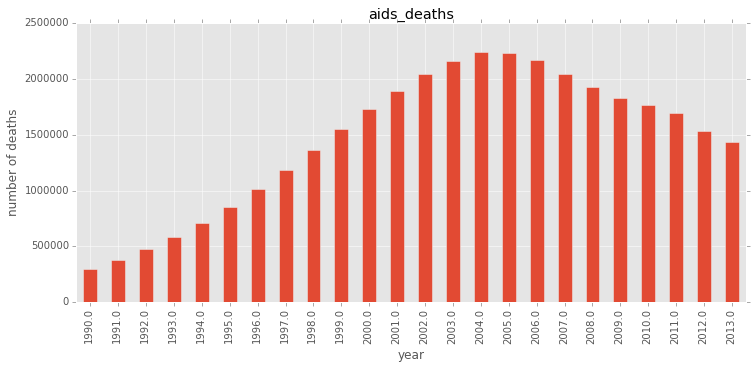

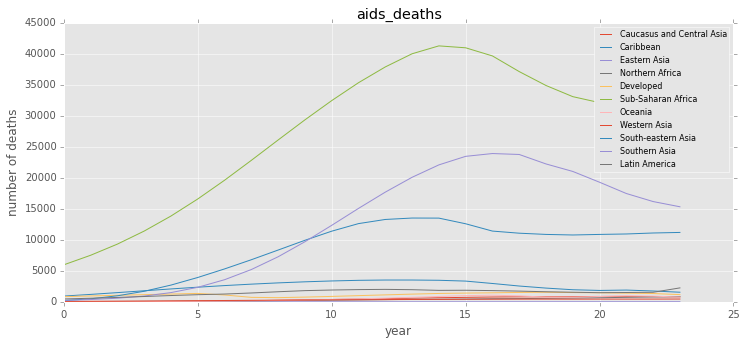

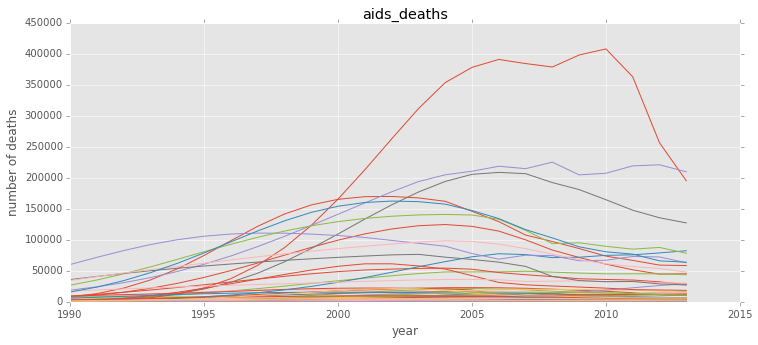

In [17]:
plot_su_data('aids_deaths', 'number of deaths')
plot_by_region('aids_deaths', 'number of deaths')
plot_by_country('aids_deaths', 'number of deaths')

In [18]:
undata.ix[undata['aids_deaths'].idxmax()][['countryname', 'year', 'aids_deaths']]

countryname    South Africa
year                   2010
aids_deaths          407865
Name: 2229, dtype: object

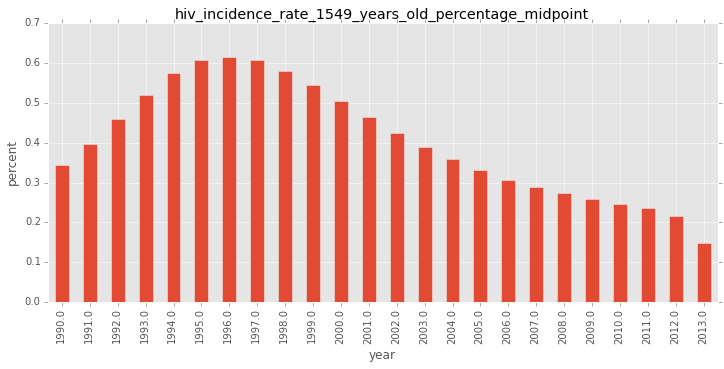

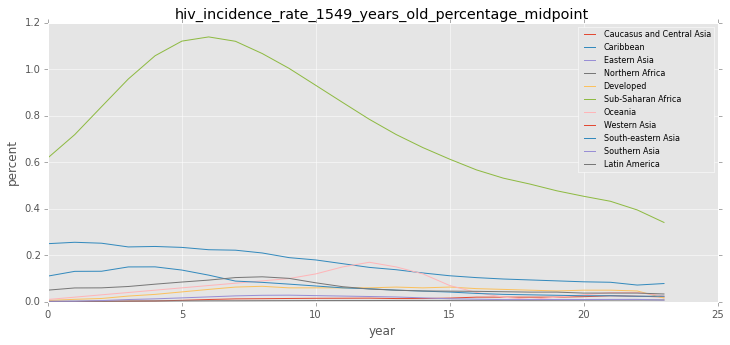

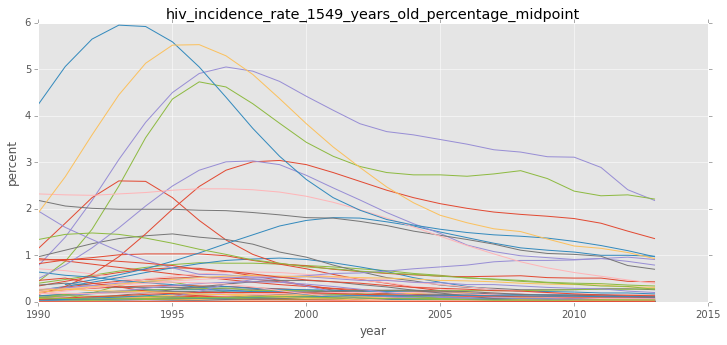

In [19]:
hiv = 'hiv_incidence_rate_1549_years_old_percentage_midpoint'
plot_me_data(hiv)
plot_by_region(hiv)
plot_by_country(hiv)

In [20]:
# worldwide yearly mean of HIV incidence rate
unlimit.groupby(['year'])[hiv].mean()

year
1990    0.344594
1991    0.397633
1992    0.458756
1993    0.520977
1994    0.573852
1995    0.606935
1996    0.616360
1997    0.607693
1998    0.580910
1999    0.545980
2000    0.505178
2001    0.464343
2002    0.424991
2003    0.389838
2004    0.358989
2005    0.332091
2006    0.307304
2007    0.288020
2008    0.274211
2009    0.259242
2010    0.246752
2011    0.236156
2012    0.216214
2013    0.147564
Name: hiv_incidence_rate_1549_years_old_percentage_midpoint, dtype: float64

In [21]:
# countries and years with highest HIV incidence rates
undata[['countryname', 'year', hiv]].sort(columns=hiv, ascending=False).head(15)

,countryname,year,hiv_incidence_rate_1549_years_old_percentage_midpoint
2237,Zimbabwe,1993,5.95
2238,Zimbabwe,1994,5.92
2236,Zimbabwe,1992,5.65
2239,Zimbabwe,1995,5.59
344,Botswana,1996,5.53
343,Botswana,1995,5.52
345,Botswana,1997,5.29
342,Botswana,1994,5.13
2235,Zimbabwe,1991,5.06
2240,Zimbabwe,1996,5.05


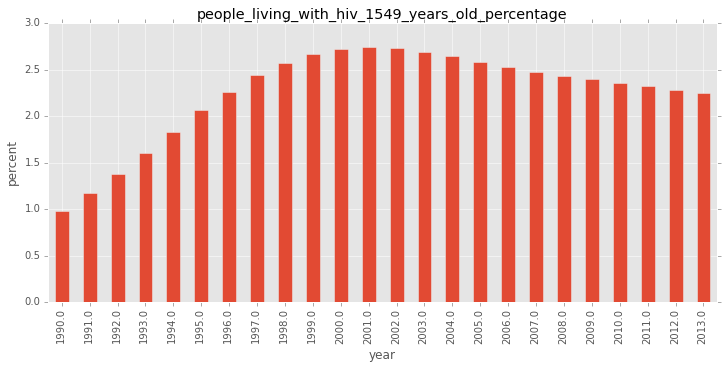

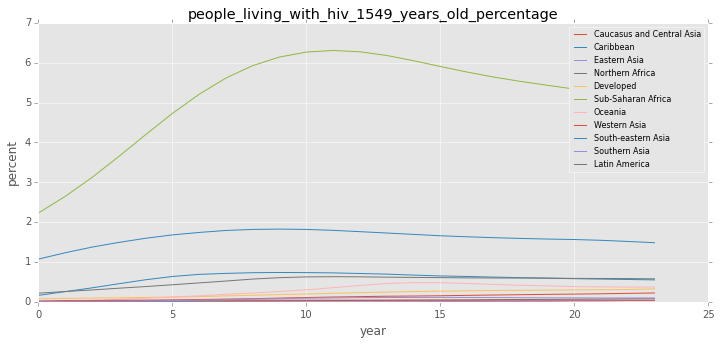

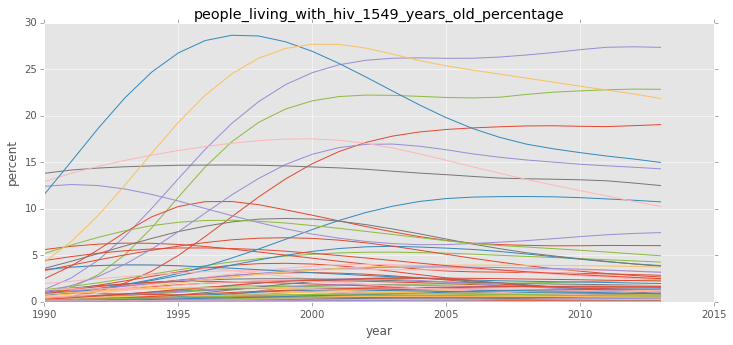

In [22]:
hiv_pct = 'people_living_with_hiv_1549_years_old_percentage'
plot_me_data(hiv_pct)
plot_by_region(hiv_pct)
plot_by_country(hiv_pct)

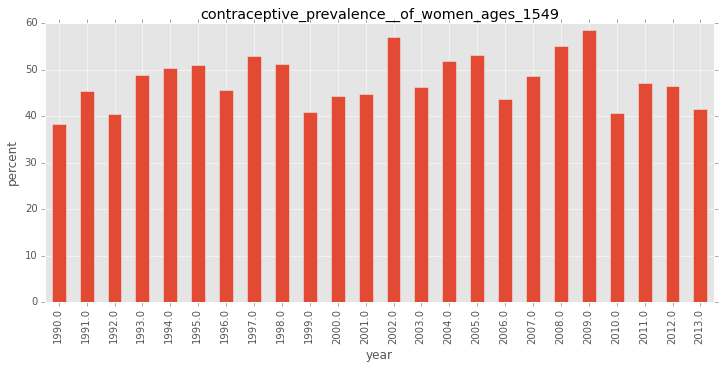

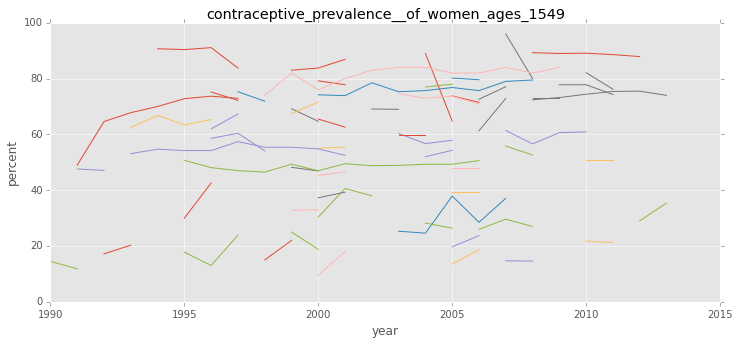

In [23]:
plot_me_data(contra)
plot_by_country(contra)

Contraceptive use data may be too sparse to use in modeling

###Save out CSV for visualization

In [24]:
yearly = pd.DataFrame(unlimit.groupby(['countryname', 'iso3code', 'year'])[hiv].mean())
bycountry = yearly.unstack()
bycountry.to_csv('hiv_incidence.csv', encoding='utf-8')

In [25]:
bycountry.head()

hiv_incidence_rate_1549_years_old_percentage_midpoint  \
year                                                                     1990   
countryname    iso3code                                                         
Afghanistan    AFG                                                     NaN      
Albania        ALB                                                     NaN      
Algeria        DZA                                                  0.0043      
American Samoa ASM                                                     NaN      
Andorra        AND                                                     NaN      

                                                                        \
year                       1991   1992    1993    1994    1995    1996   
countryname    iso3code                                                  
Afghanistan    AFG          NaN    NaN     NaN     NaN     NaN     NaN   
Albania        ALB          NaN    NaN     NaN     NaN     NaN     NaN   
Algeria        DZA       0.0053  0.006  0.0068  0.0075  0.0083  0.0087   
American Samoa ASM          NaN    NaN     NaN     NaN     NaN     NaN   
Andorra        AND          NaN    NaN     NaN     NaN     NaN     NaN   

                                                                         \
year                       1997    1998    1999    2000    2001    2002   
countryname    iso3code                                                   
Afghanistan    AFG          NaN     NaN     NaN     NaN     NaN     NaN   
Albania        ALB          NaN     NaN     NaN     NaN     NaN     NaN   
Algeria        DZA       0.0085  0.0089  0.0087  0.0088  0.0089  0.0086   
American Samoa ASM          NaN     NaN     NaN     NaN     NaN     NaN   
Andorra        AND          NaN     NaN     NaN     NaN     NaN     NaN   

                                                                               \
year                       2003    2004    2005    2006  2007    2008    2009   
countryname    iso3code                                                         
Afghanistan    AFG          NaN     NaN     NaN     NaN   NaN     NaN     NaN   
Albania        ALB          NaN     NaN     NaN     NaN   NaN     NaN     NaN   
Algeria        DZA       0.0092  0.0094  0.0092  0.0099  0.01  0.0095  0.0099   
American Samoa ASM          NaN     NaN     NaN     NaN   NaN     NaN     NaN   
Andorra        AND          NaN     NaN     NaN     NaN   NaN     NaN     NaN   

                                                   
year                     2010  2011  2012    2013  
countryname    iso3code                            
Afghanistan    AFG        NaN   NaN   NaN  0.0040  
Albania        ALB        NaN   NaN   NaN  0.0065  
Algeria        DZA       0.01  0.01  0.01  0.0100  
American Samoa ASM        NaN   NaN   NaN     NaN  
Andorra        AND        NaN   NaN   NaN     NaN

###Investigate other reproductive health variables

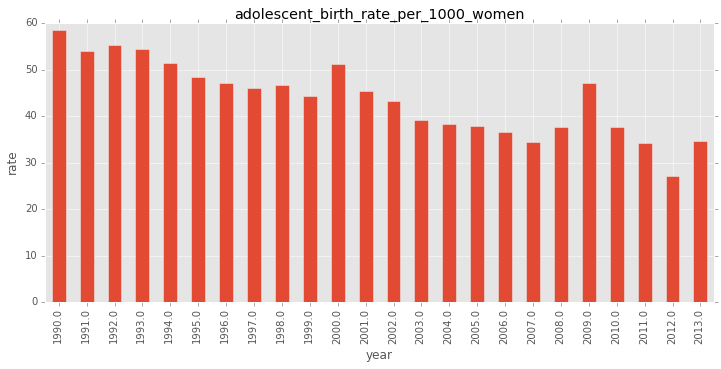

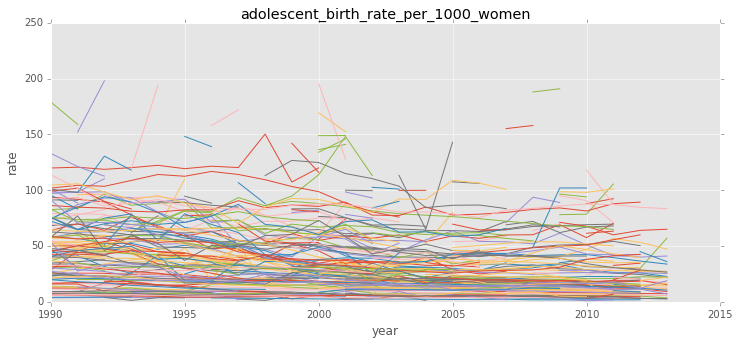

In [26]:
abr = 'adolescent_birth_rate_per_1000_women'
plot_me_data(abr, 'rate')
plot_by_country(abr, 'rate')

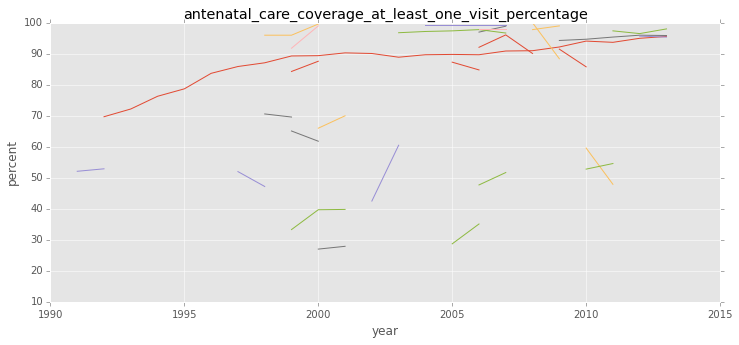

In [27]:
plot_by_country('antenatal_care_coverage_at_least_one_visit_percentage')

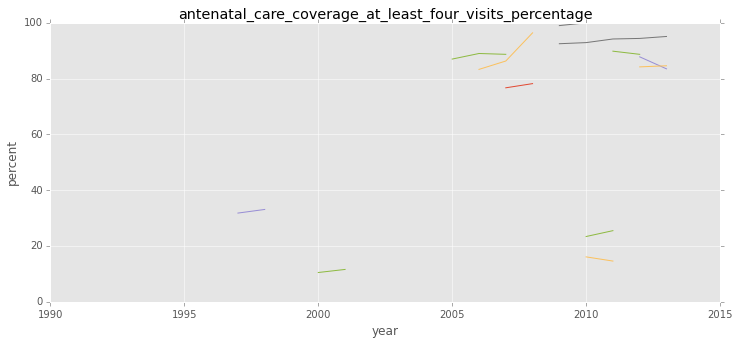

In [28]:
plot_by_country('antenatal_care_coverage_at_least_four_visits_percentage')

Antenatal care coverage data is too sparse to use in modeling

###Investigate poverty variables

In [29]:
pv_tot = 'population_below_national_poverty_line_total_percentage'
undata.ix[undata[pv_tot].idxmax()][['countryname', 'year', pv_tot]]

countryname                                                Tajikistan
year                                                             1999
population_below_national_poverty_line_total_percentage            96
Name: 2409, dtype: object

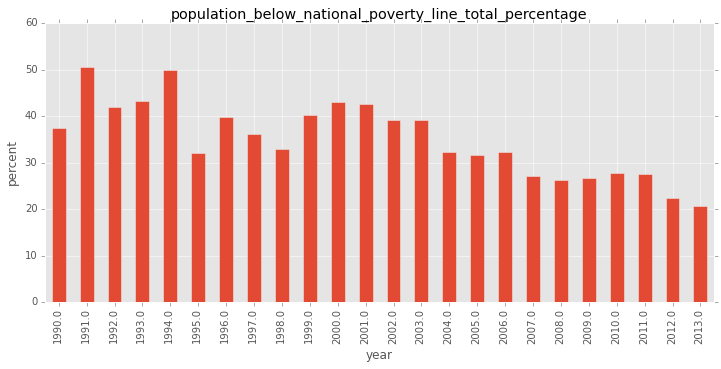

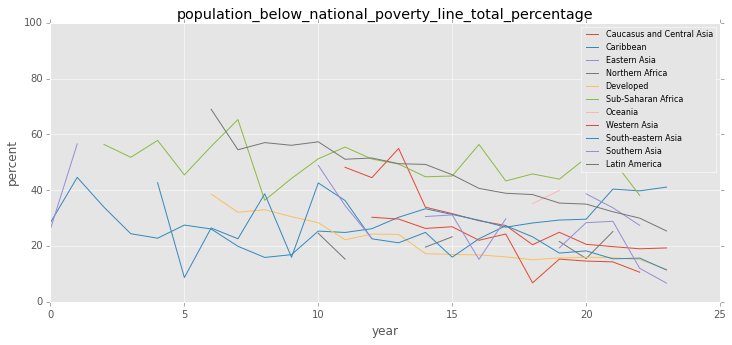

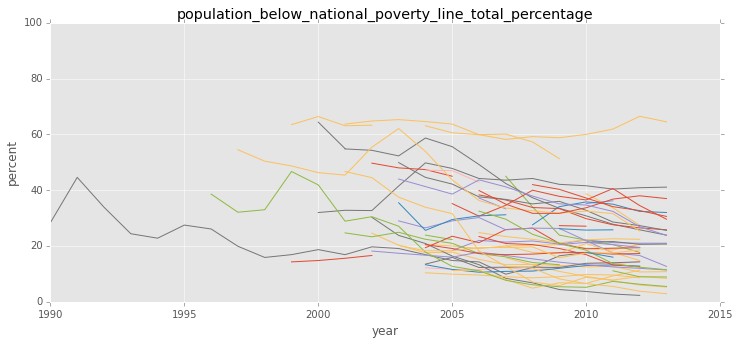

In [30]:
plot_me_data(pv_tot)
plot_by_region(pv_tot)
plot_by_country(pv_tot)

In [31]:
# print sorted dataframe since line colors repeat on plot_by_region plot
pd.DataFrame(undata.groupby(['mdgregions'])[pv_tot].mean()).sort(columns=pv_tot, ascending=False)

,population_below_national_poverty_line_total_percentage
mdgregions,
Sub-Saharan Africa,49.233684
Latin America,40.131457
Oceania,35.020000
Southern Asia,29.729583
Caribbean,29.464865
Caucasus and Central Asia,27.533333
South-eastern Asia,22.945763
Eastern Asia,22.080000
Western Asia,21.774074


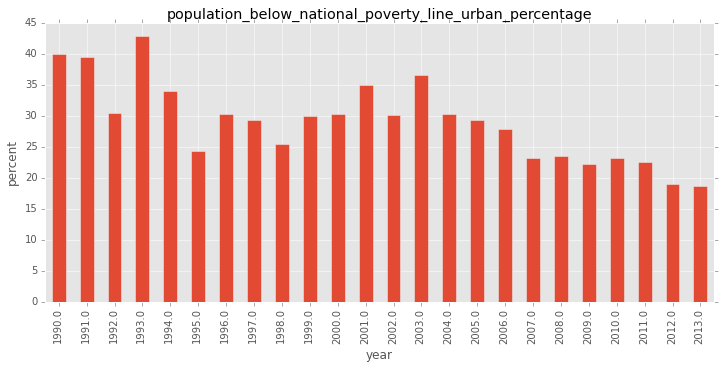

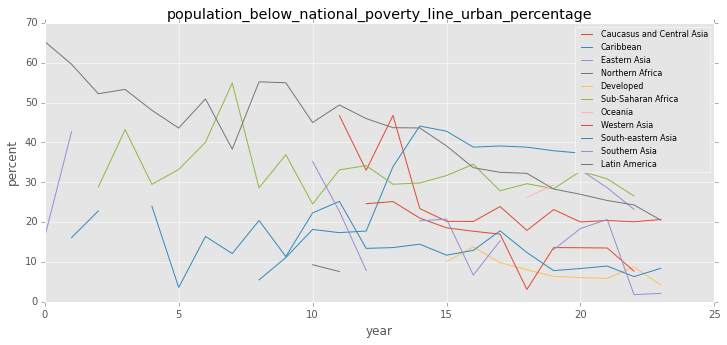

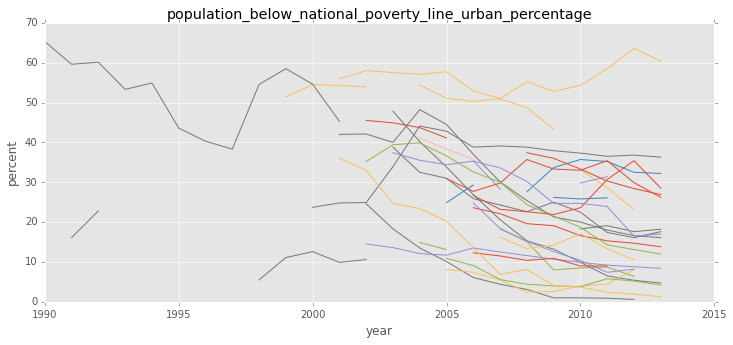

In [32]:
pv_urb = 'population_below_national_poverty_line_urban_percentage'
plot_me_data(pv_urb)
plot_by_region(pv_urb)
plot_by_country(pv_urb)

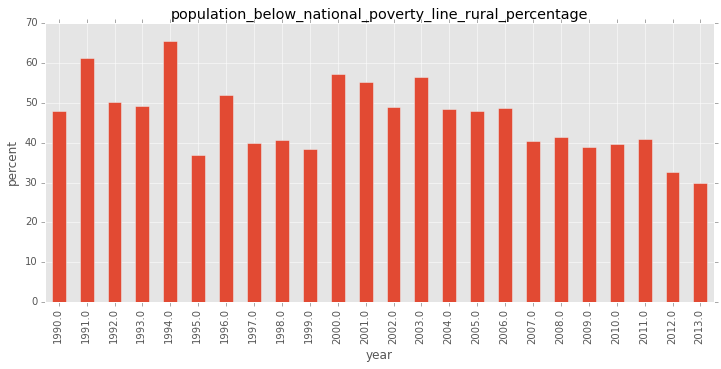

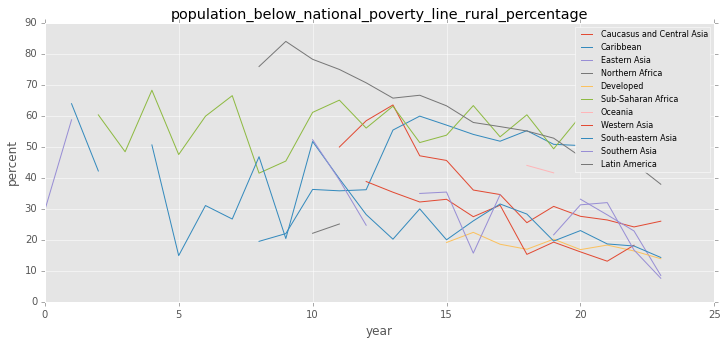

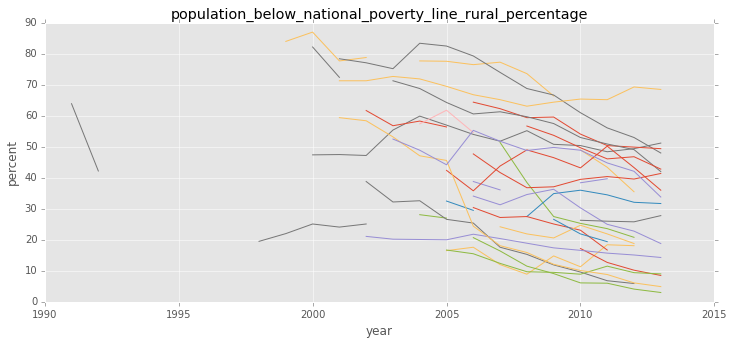

In [33]:
pv_rur = 'population_below_national_poverty_line_rural_percentage'
plot_me_data(pv_rur)
plot_by_region(pv_rur)
plot_by_country(pv_rur)

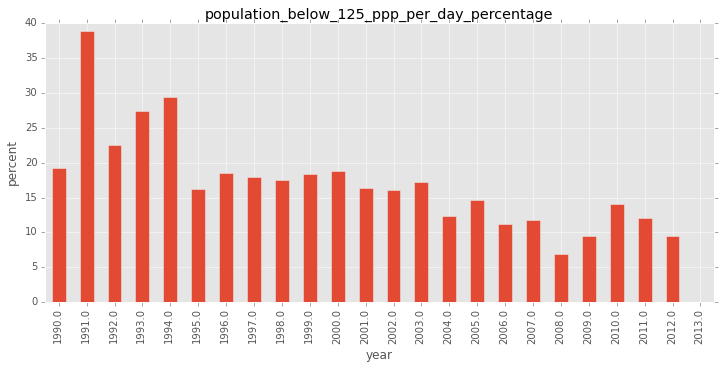

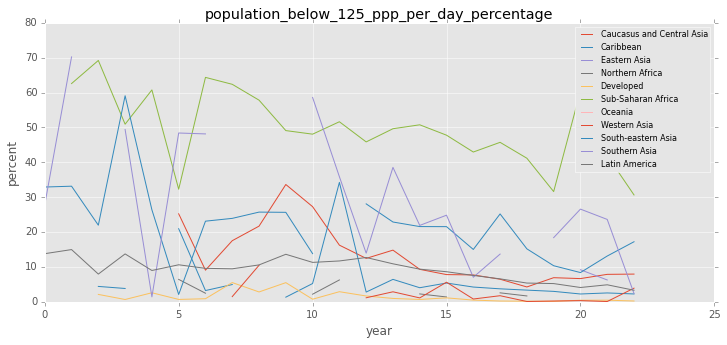

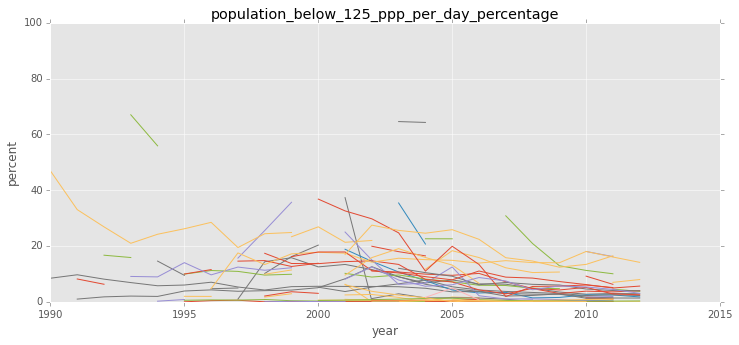

In [34]:
pv_125 = 'population_below_125_ppp_per_day_percentage'
plot_me_data(pv_125)
plot_by_region(pv_125)
plot_by_country(pv_125)

The general downward trend of these poverty variables is good, however, the data may be too sparse to use in modeling.

### Investigate international aid variables

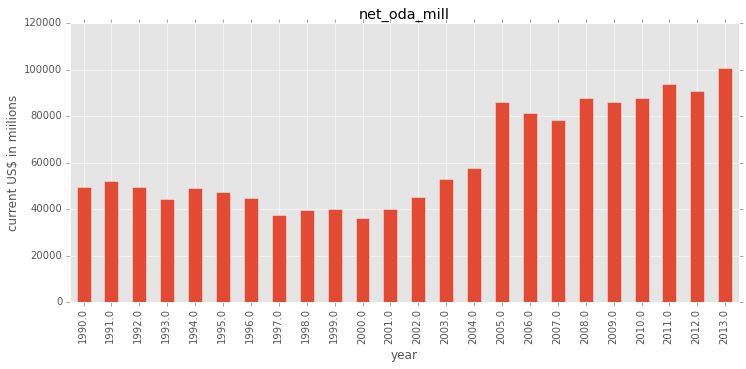

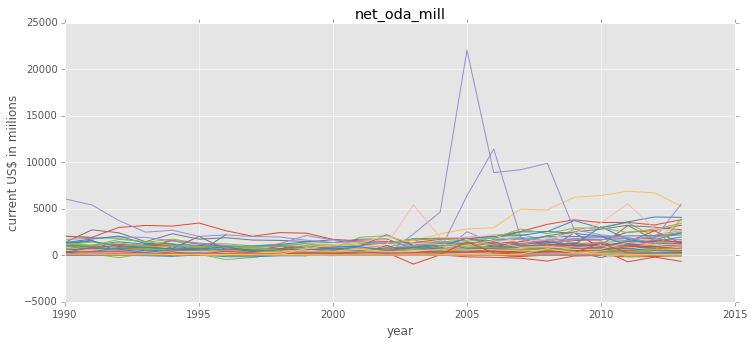

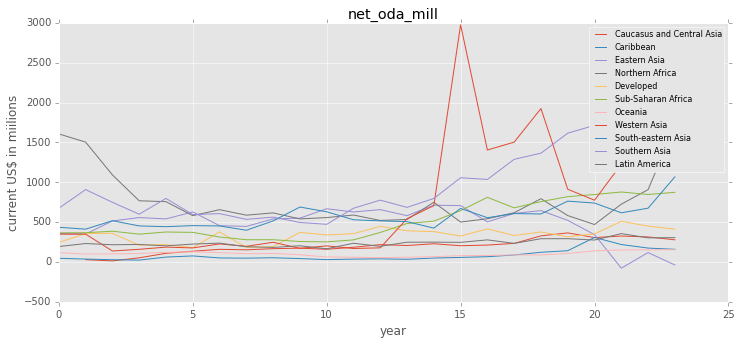

In [35]:
label = 'current US$ in miilions'

plot_su_data('net_oda_mill', label)
plot_by_country('net_oda_mill', label)
plot_by_region('net_oda_mill', label)

In [36]:
undata.ix[undata['net_oda_mill'].idxmax()][['countryname', 'year', 'net_oda_mill']]

countryname         Iraq
year                2005
net_oda_mill    22057.09
Name: 3628, dtype: object

In [37]:
# countries receiving the most development assistance
undata[['countryname', 'year', 'net_oda_mill']].sort(columns='net_oda_mill', ascending=False).head(15)

,countryname,year,net_oda_mill
3628,Iraq,2005,22057.09
1865,Nigeria,2006,11428.02
3631,Iraq,2008,9884.53
3630,Iraq,2007,9204.34
3629,Iraq,2006,8889.32
2,Afghanistan,2011,6884.85
3,Afghanistan,2012,6725.93
1,Afghanistan,2010,6426.50
1864,Nigeria,2005,6408.81
77,Afghanistan,2009,6235.40


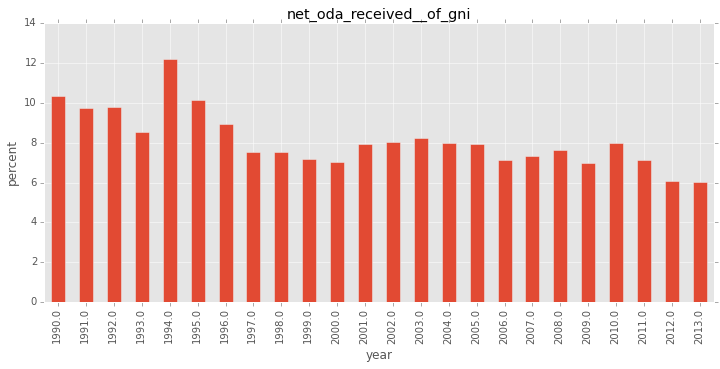

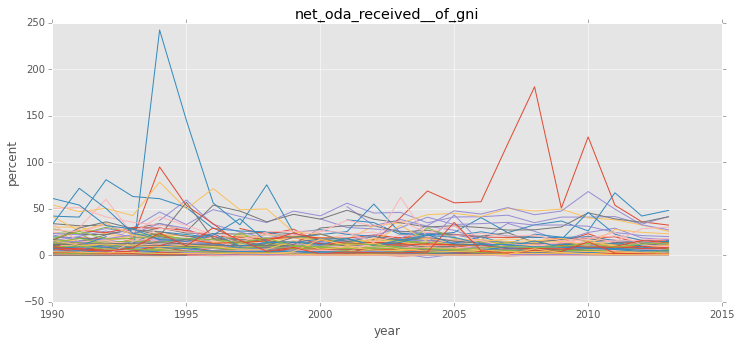

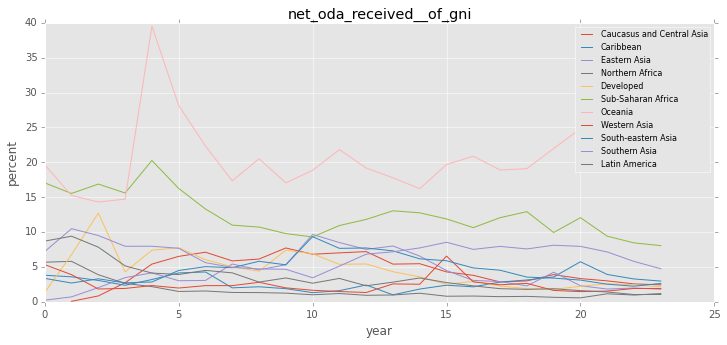

In [38]:
plot_me_data(net_odapct)
plot_by_country(net_odapct)
plot_by_region(net_odapct)

In [39]:
# countries receiving the most development assistance as a % of GNI in this period
oda1 = pd.DataFrame(undata.groupby(['countryname'])[net_odapct].mean())
oda1.sort(columns=net_odapct, ascending=False).head(10)

,net_oda_received__of_gni
countryname,
Somalia,61.657725
Liberia,55.466549
"Micronesia, Federated States of",41.302851
Afghanistan,38.321124
Marshall Islands,37.212096
Palau,37.042879
Tuvalu,35.408147
Mozambique,31.603011
Guinea-Bissau,30.890629


In [40]:
# countries receiving the most development assistance as a % of GNI by year
undata[['countryname', 'year', net_odapct]].sort(columns=net_odapct, ascending=False).head(15)

,countryname,year,net_oda_received__of_gni
4726,Palau,1994,242.286414
1506,Liberia,2008,181.187238
4727,Palau,1995,145.122312
1508,Liberia,2010,127.280502
1505,Liberia,2007,119.931172
2044,Rwanda,1994,94.946034
1755,Mozambique,1992,81.290337
1997,Guinea-Bissau,1994,78.707159
3995,Palau,1998,75.788113
4909,Nicaragua,1991,72.060323


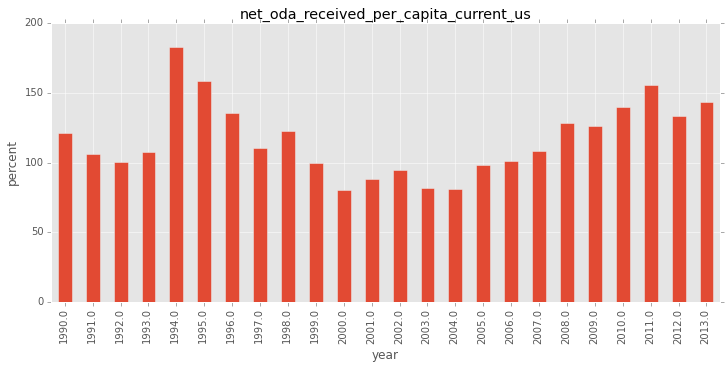

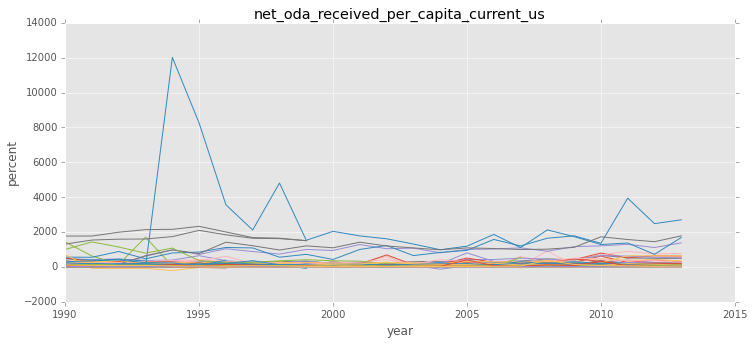

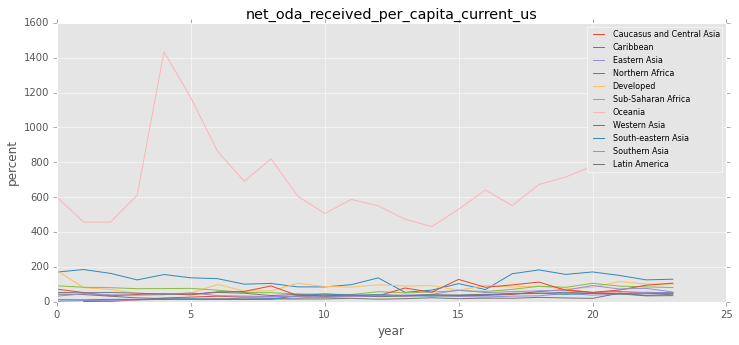

In [41]:
plot_me_data(net_odapc)
plot_by_country(net_odapc)
plot_by_region(net_odapc)

In [42]:
# countries receiving the most development assistance per capita in this period
oda2 = pd.DataFrame(undata.groupby(['countryname'])[net_odapc].mean())
oda2.sort(columns=net_odapc, ascending=False).head(10)

,net_oda_received_per_capita_current_us
countryname,
Palau,2413.824109
New Caledonia,1899.424908
French Polynesia,1649.299770
Tuvalu,1224.325602
Marshall Islands,1085.278562
"Micronesia, Federated States of",932.970207
Turks and Caicos Islands,494.661355
Northern Mariana Islands,393.464139
Tonga,357.964855


In [43]:
# countries receiving the most development assistance per capita by year
undata[['countryname', 'year', net_odapc]].sort(columns=net_odapc, ascending=False).head(15)

,countryname,year,net_oda_received_per_capita_current_us
4726,Palau,1994,12013.686403
4727,Palau,1995,8248.044045
3995,Palau,1998,4811.055927
4365,Tuvalu,2011,3941.487200
3993,Palau,1996,3561.458039
4783,Tuvalu,2013,2702.511138
4366,Tuvalu,2012,2483.772819
5279,New Caledonia,1995,2328.032773
5278,New Caledonia,1994,2155.508175
5277,New Caledonia,1993,2139.504379
